# Import Necessary Libaries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Load the Dataset

In [5]:
# Load the dataset
iris_df = pd.read_csv(r"C:\Users\USER\Downloads\IRIS FLOWER CLASSIFICATION\IRIS.csv")

# Display the first few rows of the dataframe
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Check for Missing Values and Data Information

In [6]:
# Check for missing values
print("Missing Values:\n", iris_df.isnull().sum())

# Get dataset information
print("\nDataset Information:")
print(iris_df.info())

# Basic statistics of the dataset
print("\nStatistical Summary:")
print(iris_df.describe())


Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Statistical Summary:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.8

# Exploratory Data Analysis (EDA)

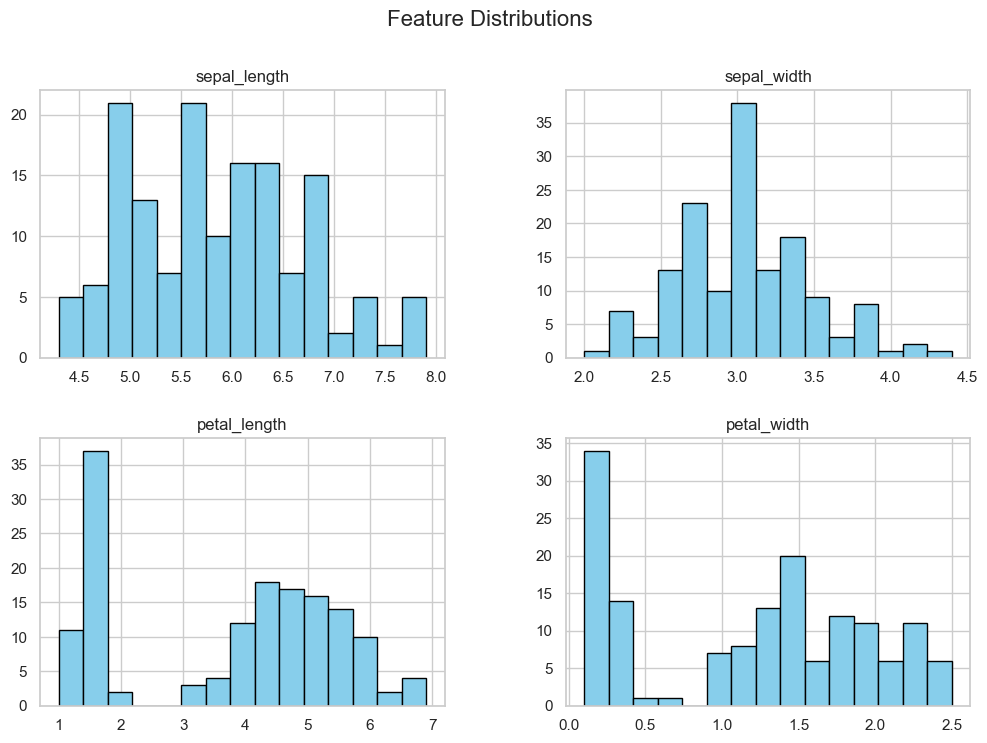

In [11]:
# Set the style of the visualizations
sns.set_theme(style="whitegrid")

# Univariate Analysis: Histograms
iris_df.hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

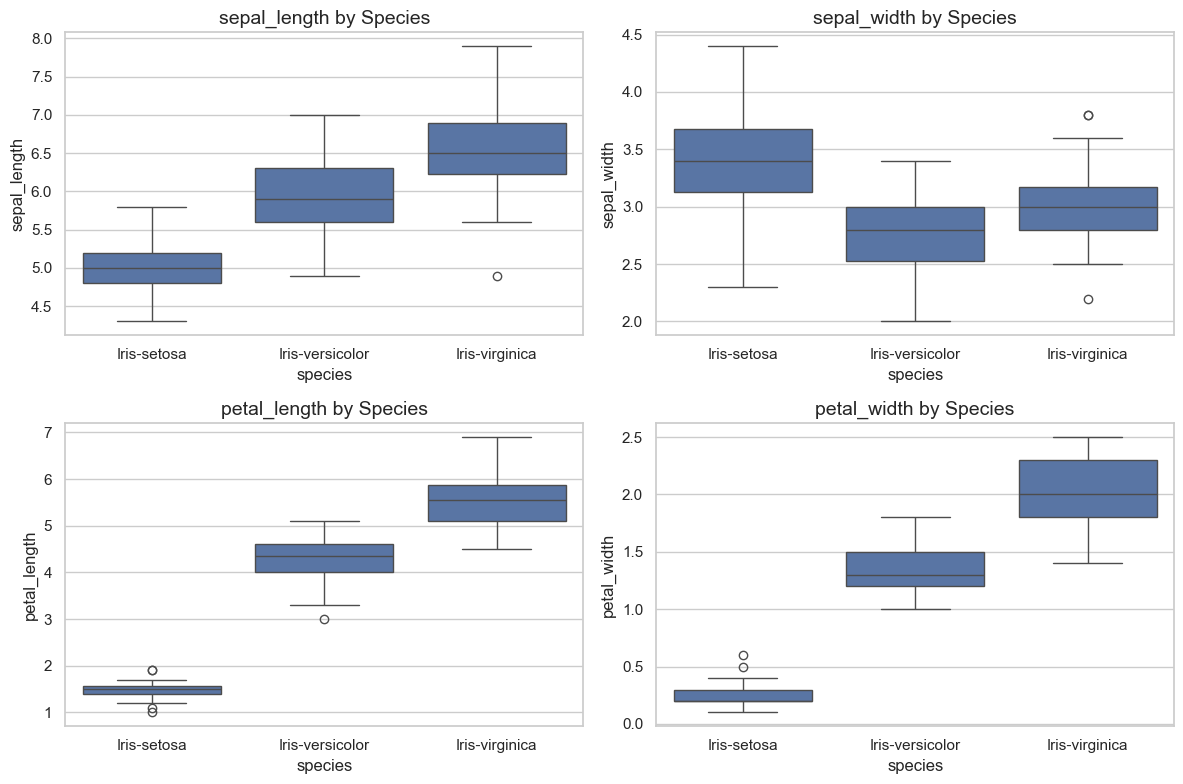

In [8]:
# Univariate Analysis: Boxplots
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris_df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=iris_df, x='species', y=column)
    plt.title(f'{column} by Species', fontsize=14)
plt.tight_layout()
plt.show()

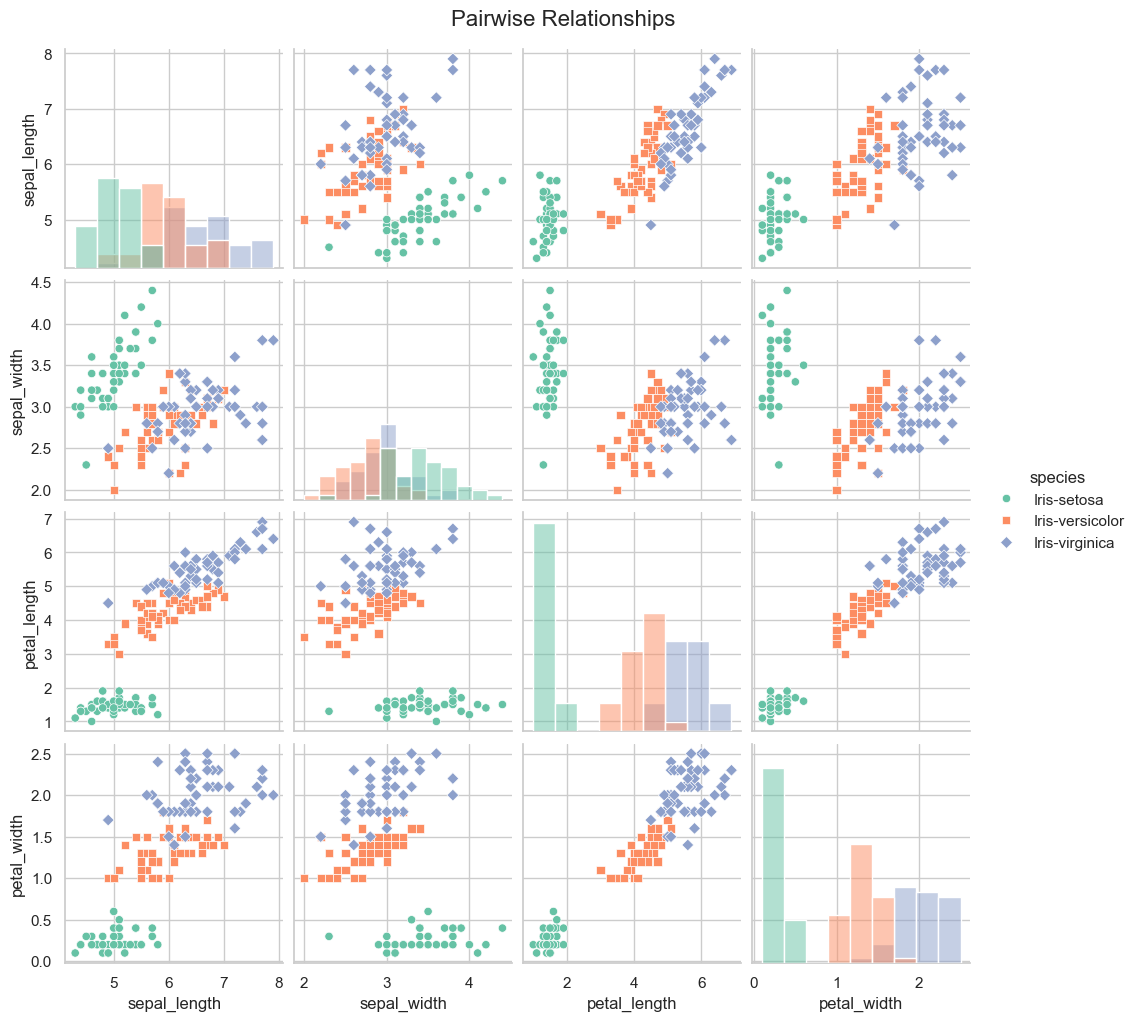

C:\Users\USER\AppData\Local\Temp\ipykernel_10776\1972087485.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=iris_df, x='species', palette='Set3')


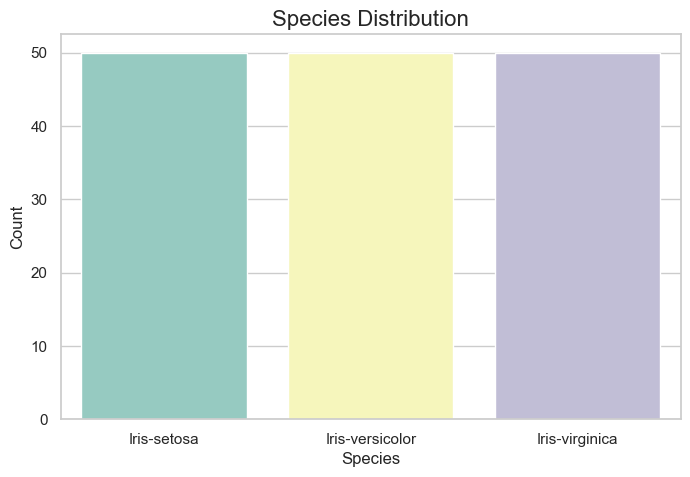

In [10]:
# Pairplot to observe relationships between features
sns.pairplot(iris_df, hue='species', diag_kind='hist', palette='Set2', markers=["o", "s", "D"])
plt.suptitle("Pairwise Relationships", y=1.02, fontsize=16)
plt.show()

# Species Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=iris_df, x='species', palette='Set3')
plt.title("Species Distribution", fontsize=16)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# Preprocess the Dataset

In [13]:
# Encode the target variable
label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

# Separate features and target
X = iris_df.iloc[:, :-2]  # All columns except 'species' and 'species_encoded'
y = iris_df['species_encoded']

# Split the Dataset into Training and Testing

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display shapes of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


# Train the Model with Logistic Regression

In [16]:
# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [18]:
# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model

Accuracy: 0.9333333333333333

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


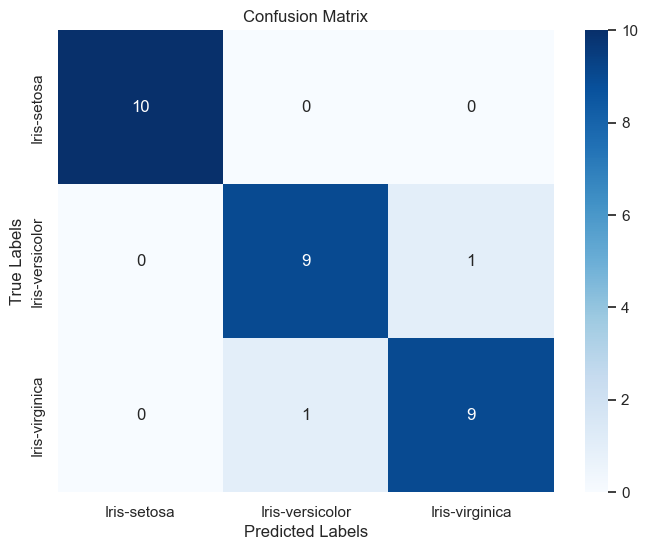

In [20]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Visualizing Decision Boundaries: Plot the decision regions for better interpretability.

In [22]:
# Split the dataset into train and test sets (for visualization, we only need a small portion)
X_train, X_test, y_train, y_test = train_test_split(X[['sepal_length', 'sepal_width']], y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Define the range for the plot
x_min, x_max = X_train['sepal_length'].min() - 1, X_train['sepal_length'].max() + 1
y_min, y_max = X_train['sepal_width'].min() - 1, X_train['sepal_width'].max() + 1


In [23]:

# Create a meshgrid to plot decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


c:\Users\USER\Downloads\IRIS FLOWER CLASSIFICATION\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


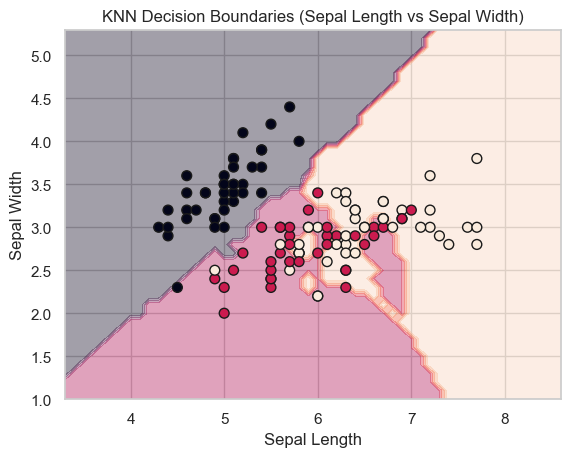

In [24]:

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the training points
plt.scatter(X_train['sepal_length'], X_train['sepal_width'], c=y_train, edgecolors='k', marker='o', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Decision Boundaries (Sepal Length vs Sepal Width)')
plt.show()

c:\Users\USER\Downloads\IRIS FLOWER CLASSIFICATION\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


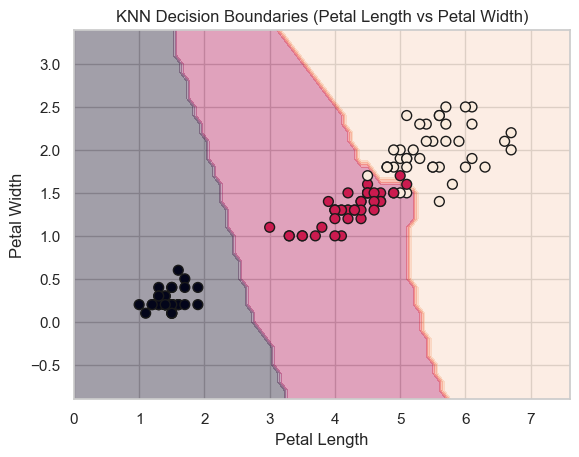

In [25]:
# Split the dataset into train and test sets (for visualization, we only need a small portion)
X_train, X_test, y_train, y_test = train_test_split(X[['petal_length', 'petal_width']], y, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Define the range for the plot
x_min, x_max = X_train['petal_length'].min() - 1, X_train['petal_length'].max() + 1
y_min, y_max = X_train['petal_width'].min() - 1, X_train['petal_width'].max() + 1

# Create a meshgrid to plot decision boundary
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the training points
plt.scatter(X_train['petal_length'], X_train['petal_width'], c=y_train, edgecolors='k', marker='o', s=50)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN Decision Boundaries (Petal Length vs Petal Width)')
plt.show()

# Train and Test the KNN models:

In [34]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predicting using KNN
y_pred_knn = knn.predict(X_test)

# Evaluate KNN
print("KNN Model")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Model
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
